# Lab 7: Numerical Differentiation
## Author: Nigel Nelson
### Introduction: 
- This lab acts as an introduction and exercise in the use of derivatives to aid in parameter optimization. First, derivatives are calculated and plotted by hand to understand what information they can convey about the functions that they're based on. Next, a method of computationally approximating the derivative is implemented. This numerical differentiation method introduces a parameter *h* which tunes the resulting differentiation approximation. Different *h* values are explored and plotting to gain a greater understanding of its impact on the resulting approximation. Then, this numerical differentiation method is used to calculate the partial derivative with respect to each parameter and the resulting cost function evaluation. This is done so that correlations between the partial derivatives and the resulting cost evaluation can be seen, and so that zeros can be found which correspond to the optimum parameters.
---
---
    
### Results:
- For experiment 1 of this lab, 4 different combinations of *h* were used to approximate the response of the Gaussian Function, with values of 0.01, 0.1, 1, and 2, respectively. By plotting each *h* value's corresponding derivative approximation alongside the analytically calculated derivative, it was visually concluded that of the 4 *h* values, **0.01** resulted in the most accurate derivative approximation. For experiment 2 the same *h* values, the corresponding derivative approximations were used to find the parameters that corresponded to local extrema. Through visual analysis, it was concluded that an *h* value of **0.01** corresponded to local extrema values that most closely matched the true local extrema. Lastly, in experiment 3, gradients were used to perform a grid search of derivative space to find the extrema in function space. Through this means, it was found that a mu value of **5.47** and a sigma value of **1.29**, corresponded to the lowest MSE score, **2e^-5**, in the feature space searched.

### Questions:
1. For experiment 1, how did your approximated derivatives (numerical solutions) 
compare to the analytical solution. Describe what effect the h term had on the accuracy 
of the approximation. Discuss considerations/tradeoffs when picking an optimal h value.
    - In general, the approximation of the derivative was just that, an approximation. No value of *h* resulted in a perfect replication of the true derivative. However, as the *h* value approached 0, the resulting derivative approximations were more and more accurate. A benefit of low *h* values is greater accuracy in the resulting derivative approximations, however, a tradeoff is that as *h* shrinks beyond a certain point, floating point approximation errors  begin to accumulate and result in the amount of error increasing due to errors representing f(x + h) - f(x) when *x* is large and *h* is extremely small, or even zero-diversion errors.

2. In experiment 2 you should have found both local extrema of the function. Describe 
what information the derivative provides and how you found these extrema. If each 
numerical approximation of the derivative didn’t always lead to both extrema of the 
function, explain why.
    - The local extrema were found by squaring the array of approximate derivative values, finding the indexes of the two smallest values, then, applying that as a mask to the original array of x values. The information that these x values provide is the location at which f(x) has a relative minimum or a relative maximum. The way in which numerical approximations may not find local extrema is due to the sample’s values used to evaluate the function. It is a possibility that for a given step size, two values near one local extrema may be closer to that true local extrema, than any other value is to the other true local extrema.
 
3. Be creative - brainstorm a way that you could leverage the information of the derivative 
to only find the minima, not all extrema.
    - A way in which this could be done would be to repeat the same process I describe above, where you would square the array of approximate derivative values, find the  indexes of the smallest values, aka the local extrema. However, you would then need to check the approximate derivative values corresponding to the zero’s index +1, and -1 one. If the index in the negative direction is negative, and the index in the positive direction is positive, then the local extrema is a minima, otherwise it is a maxima.

4. For experiment 3, you performed another grid search. Compare and contrast what 
features you were looking for in the error-space grid search (lab 06) and the derivative space grid search. Make sure to compare the computational complexity between these 
spaces. Depending on your answer do you think it makes more sense to perform a grid
search in error space or derivative space?
    -  In lab 06, we used values of mu and sigma to search through the resulting calculated MSE, so that we could find the parameter set that returned the lowest amount of value. Similarly, for experiment 3, we searched through values of mu and sigma, and the corresponding partial derivatives of the parameters with respect to the cost evaluation. We then sought the mu and sigma values that corresponded to the partial derivative values that were closest to zero. The computation complexity to perform a grid search in error space is O(n^2), whereas the big-O to search derivative space is O(n^2 * p), where p represents the number of parameters and n^2 represents the grid of features searched. Due to the necessity of computing each parameter's partial derivative, searching in derivative space is more computationally expensive. Due to this, it makes more sense to perform a grid search in error space.

5. Be even more creative – brainstorm a way (or algorithm) that you could use to leverage 
the gradient, without having to use a grid search method.
    - You could use the gradient as a search heuristic to greatly reduce the number of features calculated. This would be done by evaluating the gradient at a single point in feature space. Next, for each parameter, if the partial derivative of the parameter is negative, then adjust the parameter in the positive direction, and if the partial derivative of the parameter is positive, adjust the parameter in the negative direction. Then repeat these steps until the same parameter combination is attempted twice. This would indicate that the parameters have found a local minima, representing optimal parameter values. This method results in many less combinations of parameters being computed as instead of blindly stepping through parameter space, the gradient acts as a guide towards the optimum values.
    
### Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Numerical_Differentiation import *
from test_Numerical_Differentiation import *
from cost_functions import *

### Verifying Numerical_Differentiation implementation:

In [2]:
!python test_Numerical_Differentiation.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


## Experiment 1: Analytical vs. Numerical Differentiation
### Analytically solving for f'(x):
- f(x) = x^3 - 3 * x^2 - 144 * x + 432
- f'(x) = 3 8 x^2 - 6 * x -144
### Defining f(x), f'(x), and approximation of f'(x):

In [3]:
def f(x):
    return x**3 - 3*x**2 - 144*x + 432

In [4]:
def f_prime(x):
    return 3*x**2 - 6*x - 144

In [5]:
def aprox_f_prime(x, h):
    return (f(x + h) - f(x)) / h

### Plotting f(x) values corresponding to x value range of (-12,15):

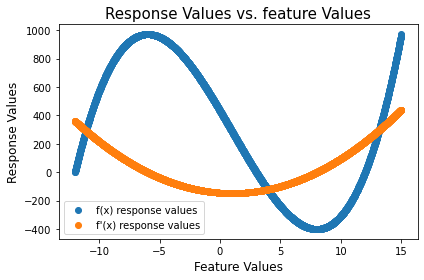

In [6]:
x_values = np.linspace(-12, 15, 2700)

plt.scatter(x_values, f(x_values), label='f(x) response values')
plt.scatter(x_values, f_prime(x_values), label="f'(x) response values")
plt.title("Response Values vs. feature Values", fontsize=15)
plt.xlabel("Feature Values", fontsize=12)
plt.ylabel("Response Values", fontsize=12)
plt.legend()
plt.tight_layout()

### Aprroximating f'(x)  with several values of *h*:

In [7]:
h_values = np.array([0.01, 0.1, 1, 2])

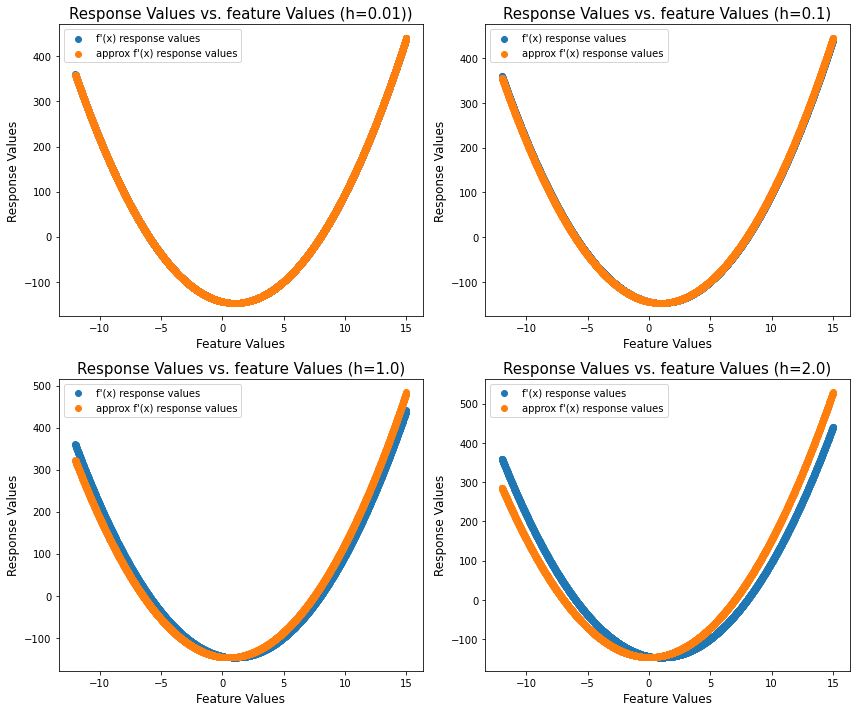

In [8]:
figure, axis = plt.subplots(2,2,figsize=(12,10))

approx_values1 = aprox_f_prime(x_values, h_values[0])
approx_values2 = aprox_f_prime(x_values, h_values[1])
approx_values3 = aprox_f_prime(x_values, h_values[2])
approx_values4 = aprox_f_prime(x_values, h_values[3])

axis[0, 0].scatter(x_values, f_prime(x_values), label="f'(x) response values")
axis[0, 0].scatter(x_values, approx_values1, label="approx f'(x) response values")
axis[0, 0].set_title("Response Values vs. feature Values (h=0.01))", fontsize=15)
axis[0, 0].set_xlabel("Feature Values", fontsize=12)
axis[0, 0].set_ylabel("Response Values", fontsize=12)
axis[0, 0].legend()

axis[0, 1].scatter(x_values, f_prime(x_values), label="f'(x) response values")
axis[0, 1].scatter(x_values, approx_values2, label="approx f'(x) response values")
axis[0, 1].set_title("Response Values vs. feature Values (h=0.1)", fontsize=15)
axis[0, 1].set_xlabel("Feature Values", fontsize=12)
axis[0, 1].set_ylabel("Response Values", fontsize=12)
axis[0, 1].legend()

axis[1, 0].scatter(x_values, f_prime(x_values), label="f'(x) response values")
axis[1, 0].scatter(x_values, approx_values3, label="approx f'(x) response values")
axis[1, 0].set_title("Response Values vs. feature Values (h=1.0)", fontsize=15)
axis[1, 0].set_xlabel("Feature Values", fontsize=12)
axis[1, 0].set_ylabel("Response Values", fontsize=12)
axis[1, 0].legend()

axis[1, 1].scatter(x_values, f_prime(x_values), label="f'(x) response values")
axis[1, 1].scatter(x_values, approx_values4, label="approx f'(x) response values")
axis[1, 1].set_title("Response Values vs. feature Values (h=2.0)", fontsize=15)
axis[1, 1].set_xlabel("Feature Values", fontsize=12)
axis[1, 1].set_ylabel("Response Values", fontsize=12)
axis[1, 1].legend()

figure.tight_layout()

## Experiment 2: 1-Dimensional Grid Search – Derivative Space

### Solving for zeros by hand:

1. f'(x) = 0
2. => 3\*x\*\*2 - 6\*x - 144 = 0
3. => (3x-24)\*(x+6) = 0
4. => 3x = 24, x = - 6
- Zeros: **x = 8, x = - 6**

### Plotting zeros on f(x):

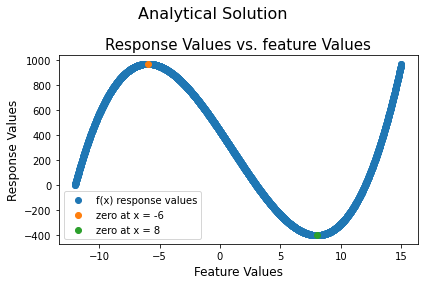

In [9]:
zeros = np.array([-6, 8])
plt.scatter(x_values, f(x_values), label='f(x) response values')
plt.scatter(zeros[0], f(zeros[0]), label="zero at x = -6")
plt.scatter(zeros[1], f(zeros[1]), label="zero at x = 8")
plt.title("Response Values vs. feature Values", fontsize=15)
plt.xlabel("Feature Values", fontsize=12)
plt.ylabel("Response Values", fontsize=12)
plt.suptitle("Analytical Solution", fontsize=16)
plt.legend()
plt.tight_layout()

### Plotting zeros found by approximation:

In [10]:
approx_zeros1 = x_values[np.argsort((approx_values1**2))[:2]]
approx_zeros2 = x_values[np.argsort((approx_values2**2))[:2]]
approx_zeros3 = x_values[np.argsort((approx_values3**2))[:2]]
approx_zeros4 = x_values[np.argsort((approx_values4**2))[:2]]

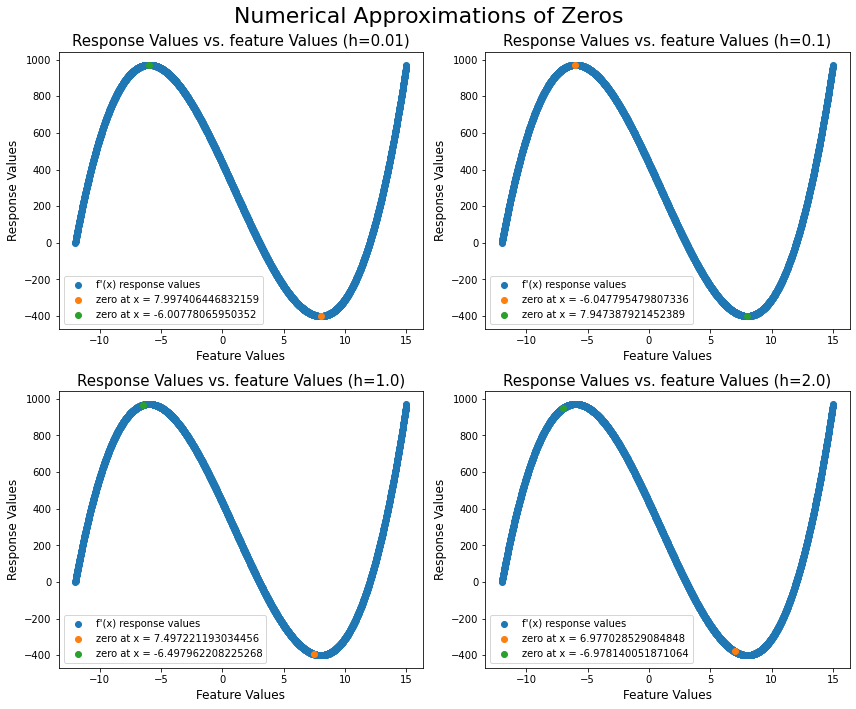

In [11]:
figure, axis = plt.subplots(2,2,figsize=(12,10))

axis[0, 0].scatter(x_values, f(x_values), label="f'(x) response values")
axis[0, 0].scatter(approx_zeros1[0], f(approx_zeros1[0]), label=f"zero at x = {approx_zeros1[0]}")
axis[0, 0].scatter(approx_zeros1[1], f(approx_zeros1[1]), label=f"zero at x = {approx_zeros1[1]}")
axis[0, 0].set_title("Response Values vs. feature Values (h=0.01)", fontsize=15)
axis[0, 0].set_xlabel("Feature Values", fontsize=12)
axis[0, 0].set_ylabel("Response Values", fontsize=12)
axis[0, 0].legend()

axis[0, 1].scatter(x_values, f(x_values), label="f'(x) response values")
axis[0, 1].scatter(approx_zeros2[0], f(approx_zeros2[0]), label=f"zero at x = {approx_zeros2[0]}")
axis[0, 1].scatter(approx_zeros2[1], f(approx_zeros2[1]), label=f"zero at x = {approx_zeros2[1]}")
axis[0, 1].set_title("Response Values vs. feature Values (h=0.1)", fontsize=15)
axis[0, 1].set_xlabel("Feature Values", fontsize=12)
axis[0, 1].set_ylabel("Response Values", fontsize=12)
axis[0, 1].legend()

axis[1, 0].scatter(x_values, f(x_values), label="f'(x) response values")
axis[1, 0].scatter(approx_zeros3[0], f(approx_zeros3[0]), label=f"zero at x = {approx_zeros3[0]}")
axis[1, 0].scatter(approx_zeros3[1], f(approx_zeros3[1]), label=f"zero at x = {approx_zeros3[1]}")
axis[1, 0].set_title("Response Values vs. feature Values (h=1.0)", fontsize=15)
axis[1, 0].set_xlabel("Feature Values", fontsize=12)
axis[1, 0].set_ylabel("Response Values", fontsize=12)
axis[1, 0].legend()

axis[1, 1].scatter(x_values, f(x_values), label="f'(x) response values")
axis[1, 1].scatter(approx_zeros4[0], f(approx_zeros4[0]), label=f"zero at x = {approx_zeros4[0]}")
axis[1, 1].scatter(approx_zeros4[1], f(approx_zeros4[1]), label=f"zero at x = {approx_zeros4[1]}")
axis[1, 1].set_title("Response Values vs. feature Values (h=2.0)", fontsize=15)
axis[1, 1].set_xlabel("Feature Values", fontsize=12)
axis[1, 1].set_ylabel("Response Values", fontsize=12)
axis[1, 1].legend()

plt.suptitle("Numerical Approximations of Zeros", fontsize=22)
figure.tight_layout()

## Experiment 3: Gaussian Model Grid Search – Derivative Space
### Loading gaussdist.csv:

In [12]:
data = np.loadtxt(open("gaussdist.csv", "rb"), delimiter=",")
data[:5]

array([[6.99000000e+00, 1.56842355e-01],
       [8.90000000e+00, 7.89692304e-03],
       [9.58000000e+00, 1.55088416e-03],
       [5.46000000e+00, 3.18990459e-01],
       [1.38000000e+00, 1.39635489e-03]])

### Initializing NumericalDifferentiation (Delta = 1e-5):

In [13]:
features = data[:, 0]
responses = data[:, 1]

gaussian_func = GaussianCostFunction(features, responses)
num_dif = NumericalDifferentiation(.00001)

### Calculating gradients for range of mu and sigma values:

In [14]:
mu = np.linspace(5, 6, 100)
sigma = np.linspace(1, 1.75, 50)

mus, sigmas = np.meshgrid(mu, sigma)
params = np.array([mus.flatten(), sigmas.flatten()]).T
gradients = np.zeros(params.shape)

for i in range(params[:, 0].size):
    gradients[i] = num_dif.gradient(gaussian_func, params[i])

### Plotting mu partial derivative values:

Text(0.5, 1.0, 'Sigma Values vs Mu Values')

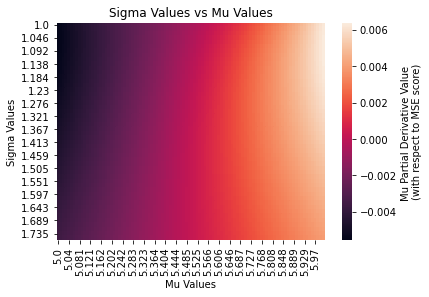

In [15]:
mu_gradients = gradients[:, 0]

df = pd.DataFrame(data=mu_gradients.reshape(mus.shape), columns=mu.round(3), index=sigma.round(3))
sns.heatmap(df, cbar_kws={'label':'Mu Partial Derivative Value \n(with respect to MSE score)'})
plt.xlabel("Mu Values")
plt.ylabel("Sigma Values")
plt.title("Sigma Values vs Mu Values")

### Plotting sigma partial derivative values:

Text(0.5, 1.0, 'Sigma Values vs Mu Values')

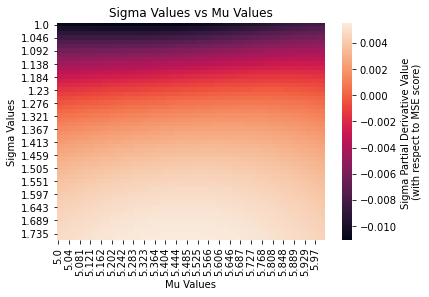

In [16]:
sigma_gradients = gradients[:, 1]

df = pd.DataFrame(data=sigma_gradients.reshape(sigmas.shape), columns=mu.round(3), index=sigma.round(3))
sns.heatmap(df, cbar_kws={'label':'Sigma Partial Derivative Value \n(with respect to MSE score)'})
plt.xlabel("Mu Values")
plt.ylabel("Sigma Values")
plt.title("Sigma Values vs Mu Values")

### Finding approximate zeros of derivation values:

In [17]:
mu_idx = np.abs(mu_gradients).argmin()
sigma_idx = np.abs(sigma_gradients).argmin()

mu_zero = params[:, 0][mu_idx]
sigma_zero = params[:, 1][sigma_idx]

print(f'The mu value that corresponds to a zero is: {mu_zero}')
print(f'The sigma value that corresponds to a zero is: {sigma_zero}')

The mu value that corresponds to a zero is: 5.474747474747475
The sigma value that corresponds to a zero is: 1.2908163265306123


### Using zero's corresponding parameter values to predict response variables:

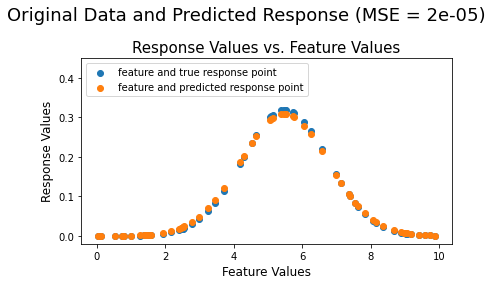

In [18]:
pred_y = gaussian_func.predict(features, np.array([mu_zero, sigma_zero]))
mse_score = gaussian_func.cost(np.array([mu_zero, sigma_zero]))

plt.scatter(features, responses, label='feature and true response point')
plt.scatter(features, pred_y, label='feature and predicted response point')
plt.title("Response Values vs. Feature Values", fontsize=15)
plt.xlabel("Feature Values", fontsize=12)
plt.ylabel("Response Values", fontsize=12)
plt.suptitle(f'Original Data and Predicted Response (MSE = {round(mse_score, 5)})', fontsize=18)
plt.legend(loc=2)
plt.ylim(-.02, .45)
plt.tight_layout()